<a href="https://colab.research.google.com/github/erikjskie/ensemblemerge_manuscript/blob/main/Supplementary_Fig3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(magrittr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fig1.csv")
dat = read.table(file = "skiex003/datasets/EnsembleMerge/fig1.csv", header = T, sep = ",")
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/scVI.csv")
scvi = read.table(file = "skiex003/datasets/EnsembleMerge/scVI.csv", header = T, sep = ",")
scvi$Dataset = recode_factor(scvi$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")
scvi = scvi[,c("score", "score_method", "method", "Dataset", "Datasets")]
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/fastMNN.csv")
mnn = read.table(file = "skiex003/datasets/EnsembleMerge/fastMNN.csv", header = T, sep = ",")
mnn$Dataset = recode_factor(mnn$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_3 = "Chen 2020", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")
mnn = mnn[,c("score", "score_method", "method", "Dataset", "Datasets")]
dat = rbind(dat, mnn)
dat = rbind(dat, scvi)
dat = dat[which(dat$Dataset != "Chen 2020"), ]
Metric_Colors = c("ARI_Cell" = "#C93327", "NMI" = "#F4CDB3", "ASW_Cell" = "#F8766D", "GC" = "#857622", "ARI_Batch" = "#8A9DA4",  "ASW_Batch" = "#75A08B")
dat$method = factor(dat$method, levels = c("EnsembleMerge", "Seurat", "Harmony",  "Liger",  "Scanorama", "BBKNN", "fastMNN", "scVI","Uncorrected"))
dat$score_method = factor(dat$score_method, levels = c("NMI", "ARI_Cell", "ASW_Cell", "GC",  "ARI_Batch", "ASW_Batch"))
range0_1 <- function(x){(x-min(x))/(max(x)-min(x))}
dat %<>%  group_by(score_method, Datasets) %>% mutate(Rank = rank(score)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(Rank_Sum = sum(Rank)) %>% ungroup() %>% group_by(score_method, method) %>% mutate(avg_rank = mean(Rank)) %>% ungroup() %>% mutate(scaled_rank_sum = range0_1(Rank_Sum))

dat$datasets = factor(dat$Datasets, levels = c("Dataset_1", "Dataset_2", "Dataset_4",
                                                                          "Dataset_5", "Dataset_6", "Dataset_7", "Dataset_8", "Dataset_9",
                                                                          "Dataset_10", "Dataset_11", "Dataset_12", "Dataset_13", "Dataset_14",
                                                                          "Dataset_15", "Dataset_16","Dataset_17","Dataset_18"))
                                                                          
dat$Dataset = recode_factor(dat$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")

Method_Colors = c("EnsembleMerge" = "#66D1C2", "Seurat" = "#528460", "Harmony" = "#6B8D5E",  "Liger" = "#8DAB81", "Scanorama" = "#C74955", "BBKNN" = "#D5757E", "fastMNN" = "#E099A0",  "scVI" = "#EAB8BD", "Uncorrected" = "#F4DDDC")

dat %>% head(n = 20)

score,score_method,method,Dataset,Datasets,Rank,Rank_Sum,avg_rank,scaled_rank_sum,datasets
<dbl>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9950000,ARI_Batch,BBKNN,Villani 2017,Dataset_1,7,96.0,5.647059,0.6894737,Dataset_1
0.6140000,ARI_Cell,BBKNN,Villani 2017,Dataset_1,1,81.0,4.764706,0.5315789,Dataset_1
0.9970000,ASW_Batch,BBKNN,Villani 2017,Dataset_1,7,103.5,6.088235,0.7684211,Dataset_1
0.6620000,ASW_Cell,BBKNN,Villani 2017,Dataset_1,1,73.0,4.294118,0.4473684,Dataset_1
0.9892466,GC,BBKNN,Villani 2017,Dataset_1,7,101.0,5.941176,0.7421053,Dataset_1
0.6130000,NMI,BBKNN,Villani 2017,Dataset_1,1,77.0,4.529412,0.4894737,Dataset_1
0.8210000,ARI_Batch,BBKNN,Paul 2015,Dataset_10,4,96.0,5.647059,0.6894737,Dataset_10
0.4920000,ARI_Cell,BBKNN,Paul 2015,Dataset_10,2,81.0,4.764706,0.5315789,Dataset_10
0.8640000,ASW_Batch,BBKNN,Paul 2015,Dataset_10,3,103.5,6.088235,0.7684211,Dataset_10


## Supplemental Figure 3A

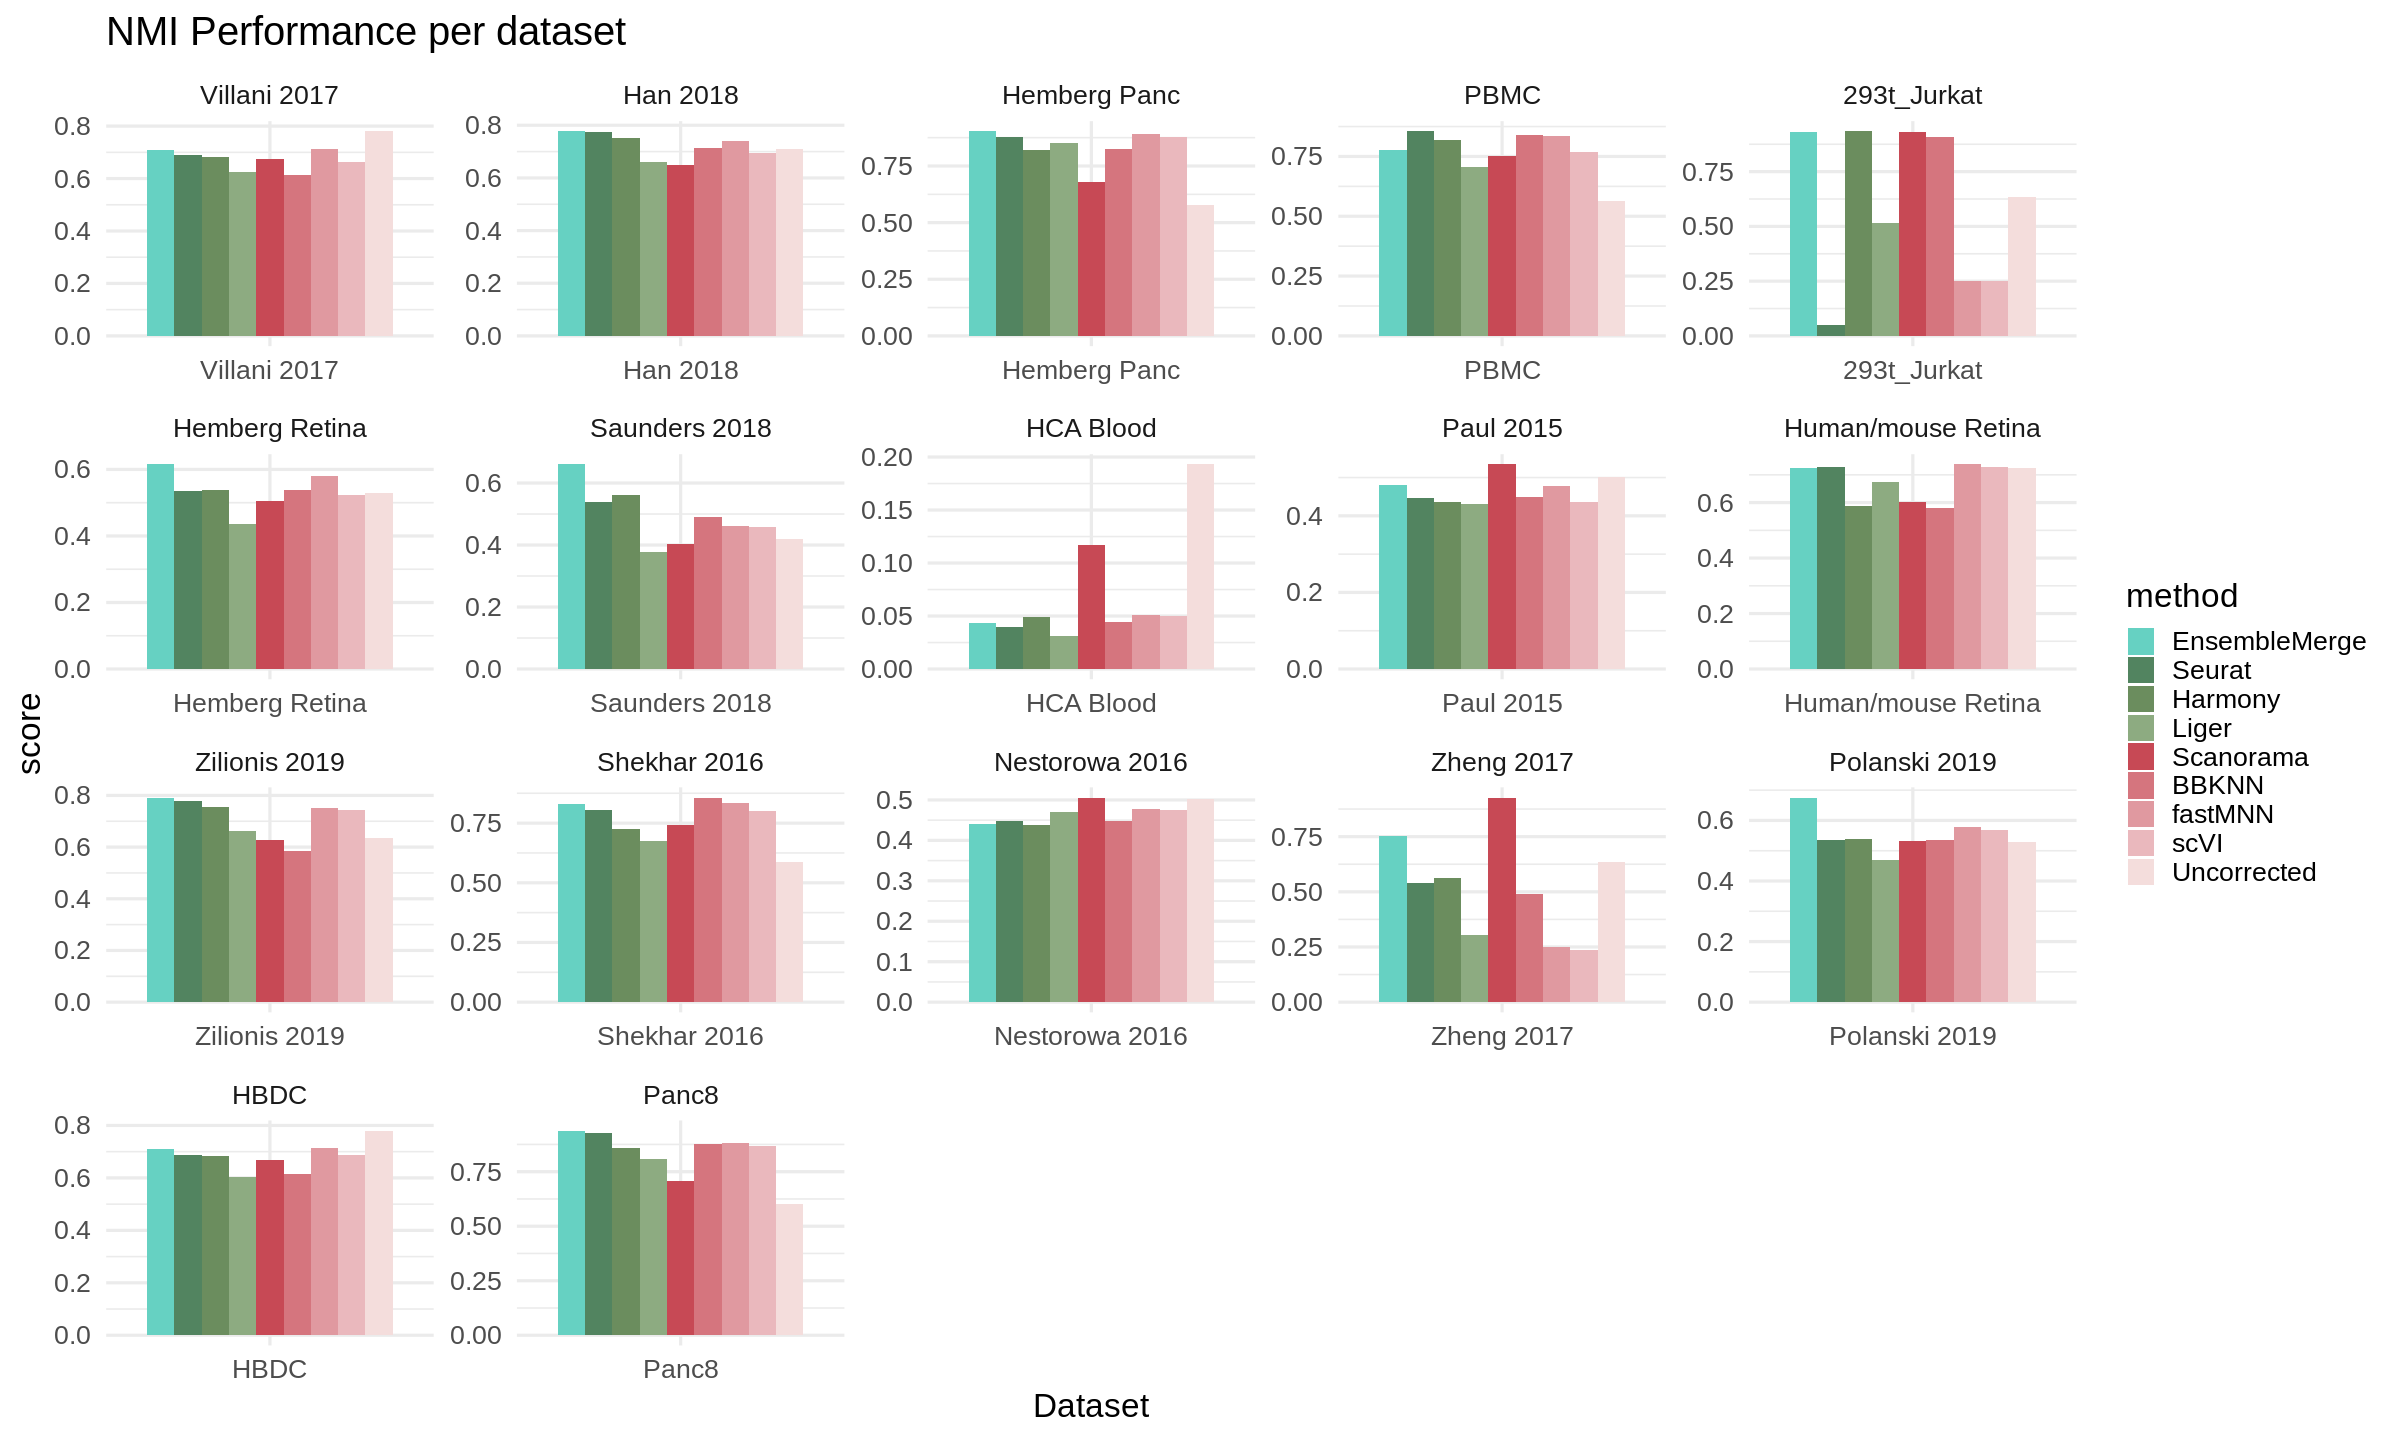

In [3]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "NMI"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "NMI Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplemental Figure 3B

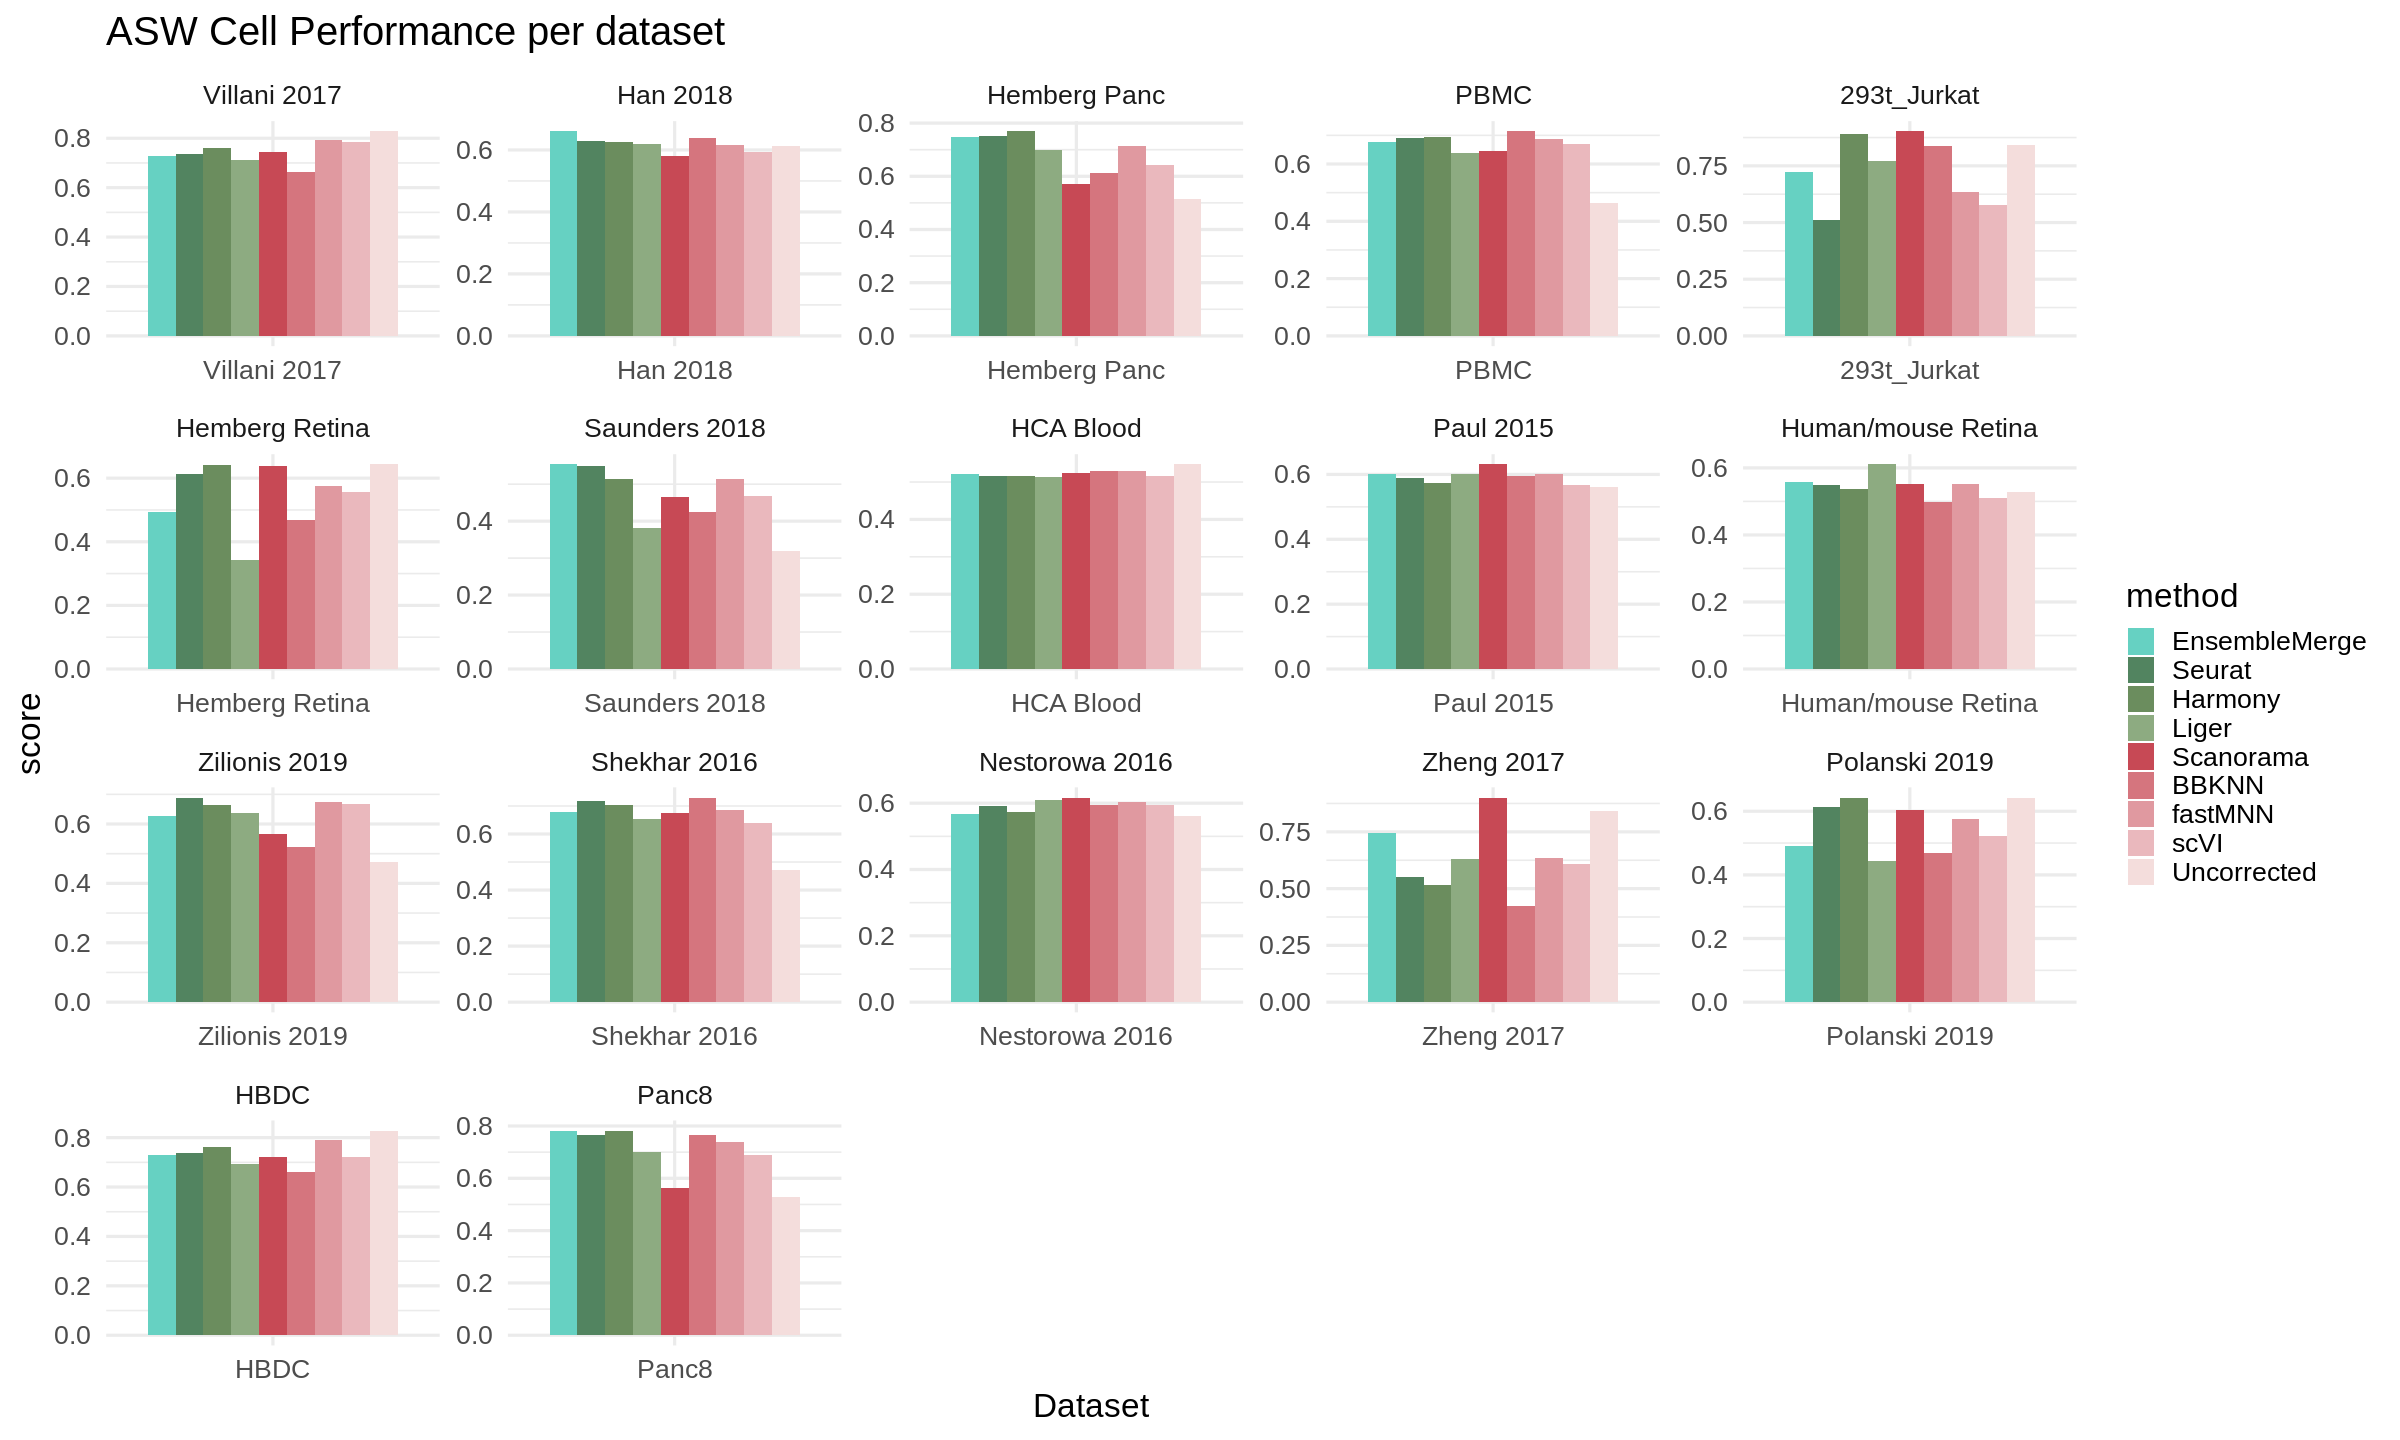

In [4]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ASW_Cell"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ASW Cell Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplemental Figure 3C

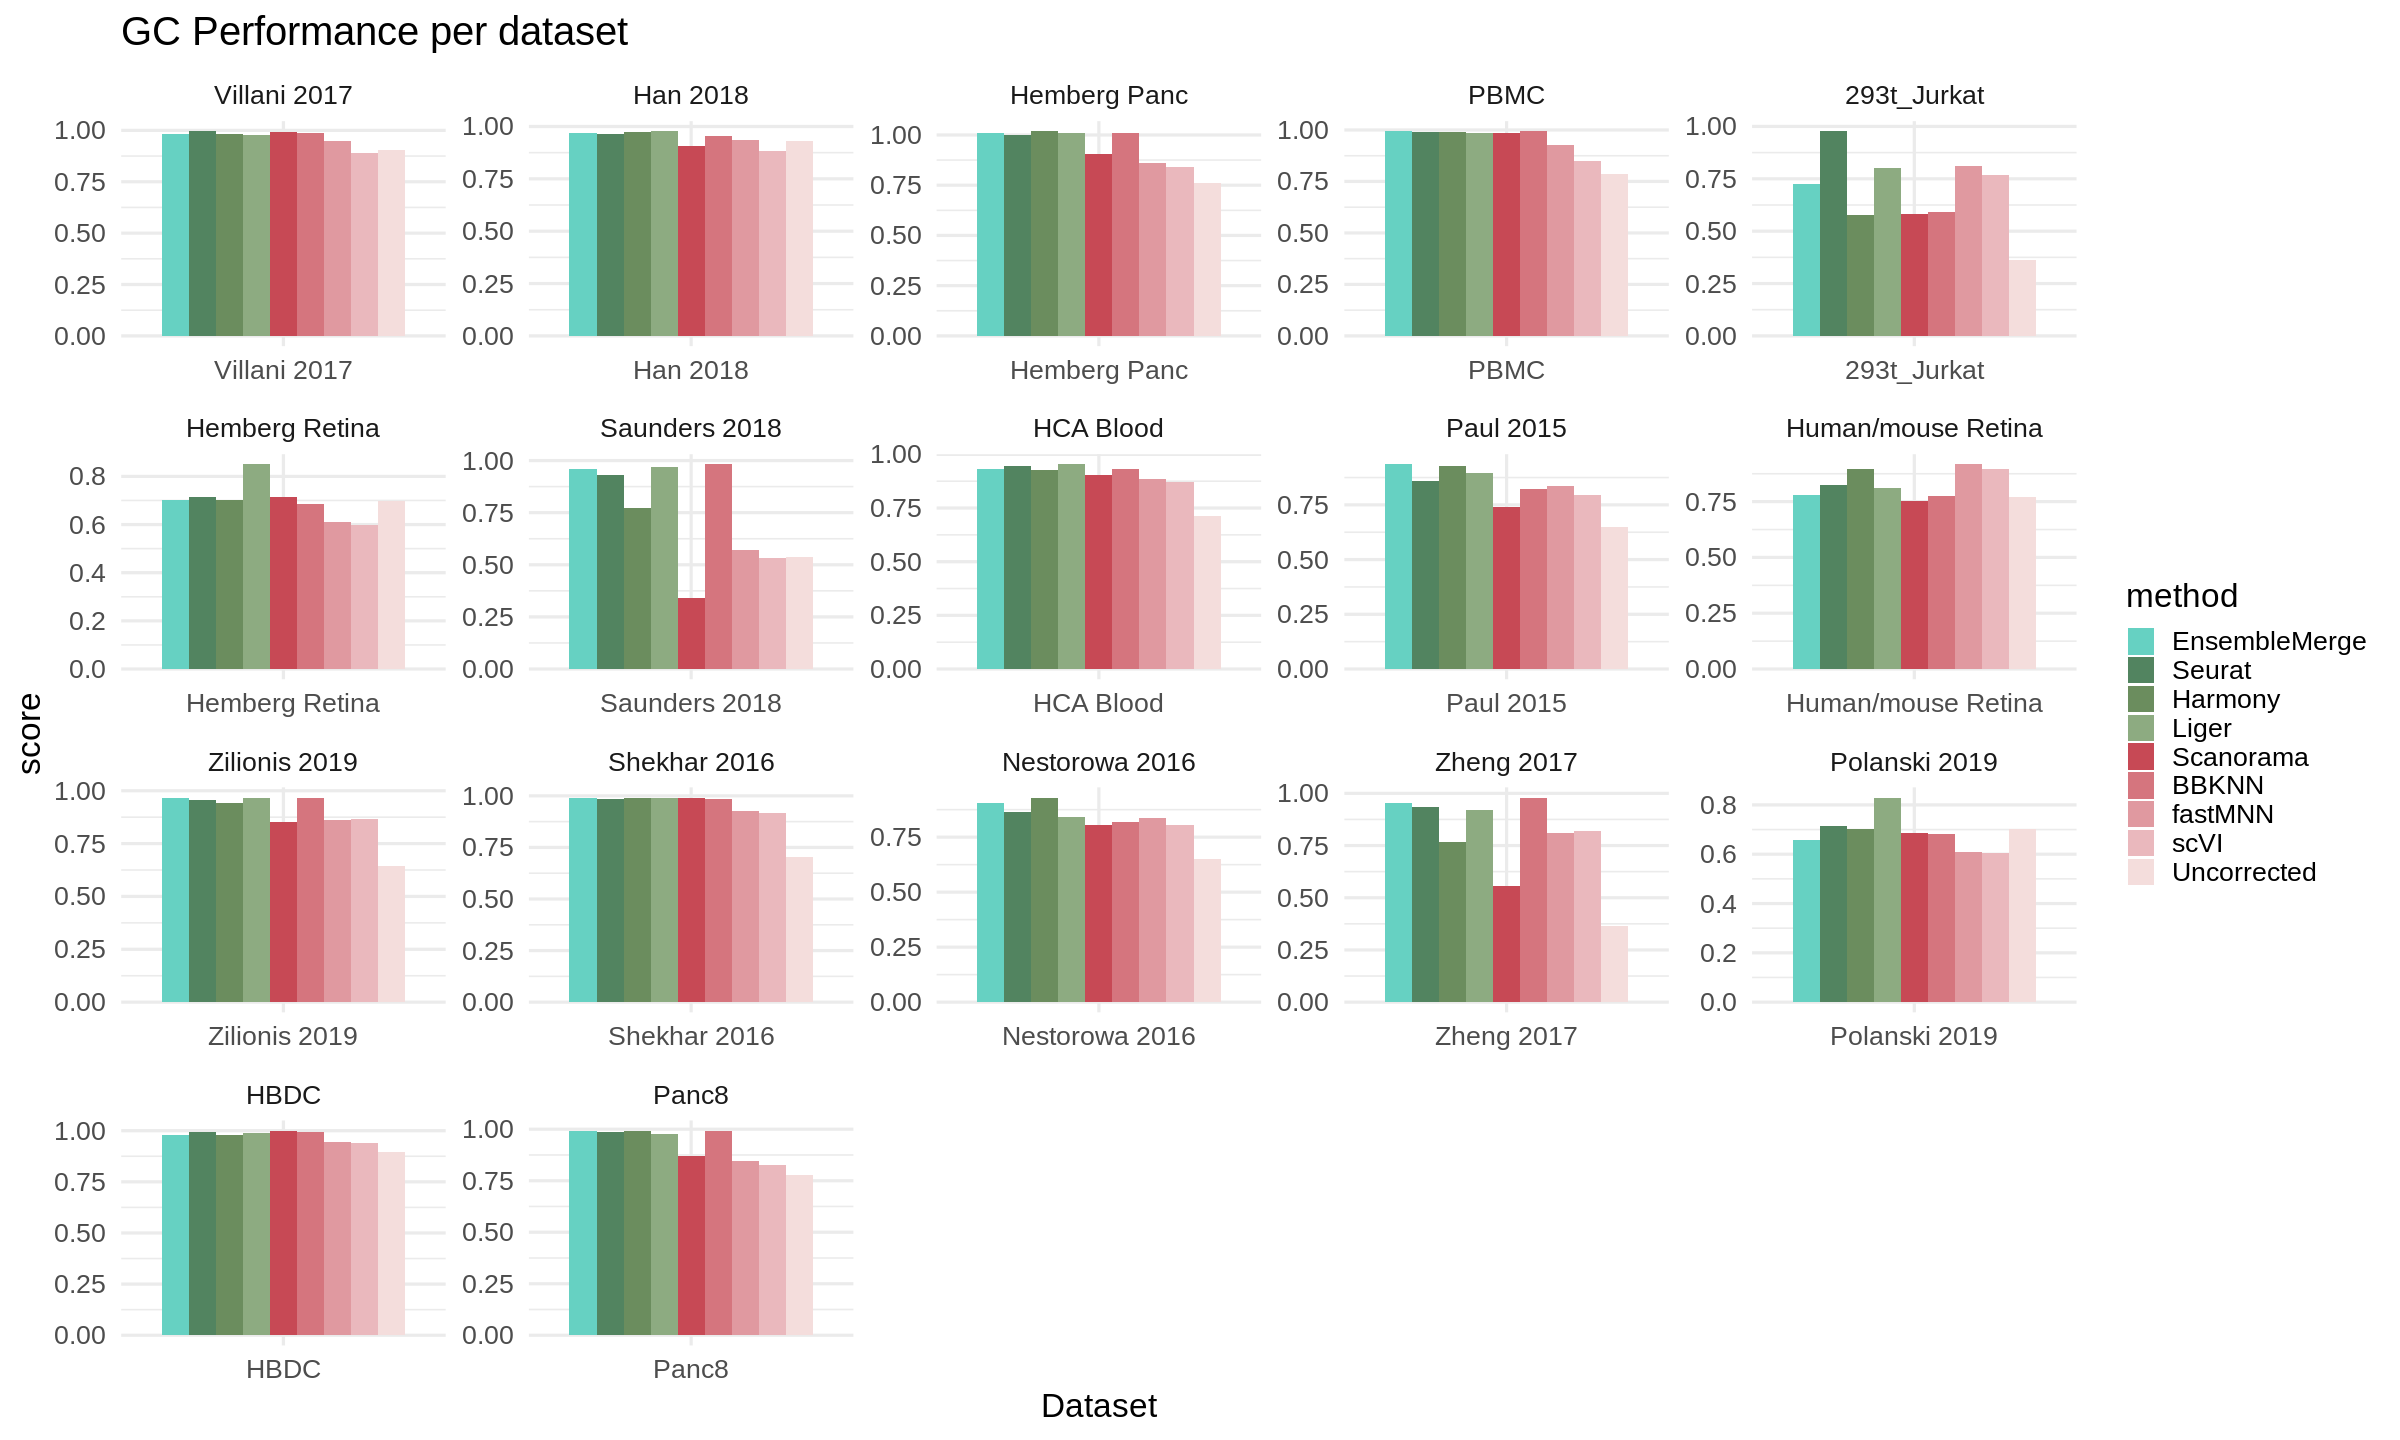

In [5]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "GC"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "GC Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplemental Figure 3D

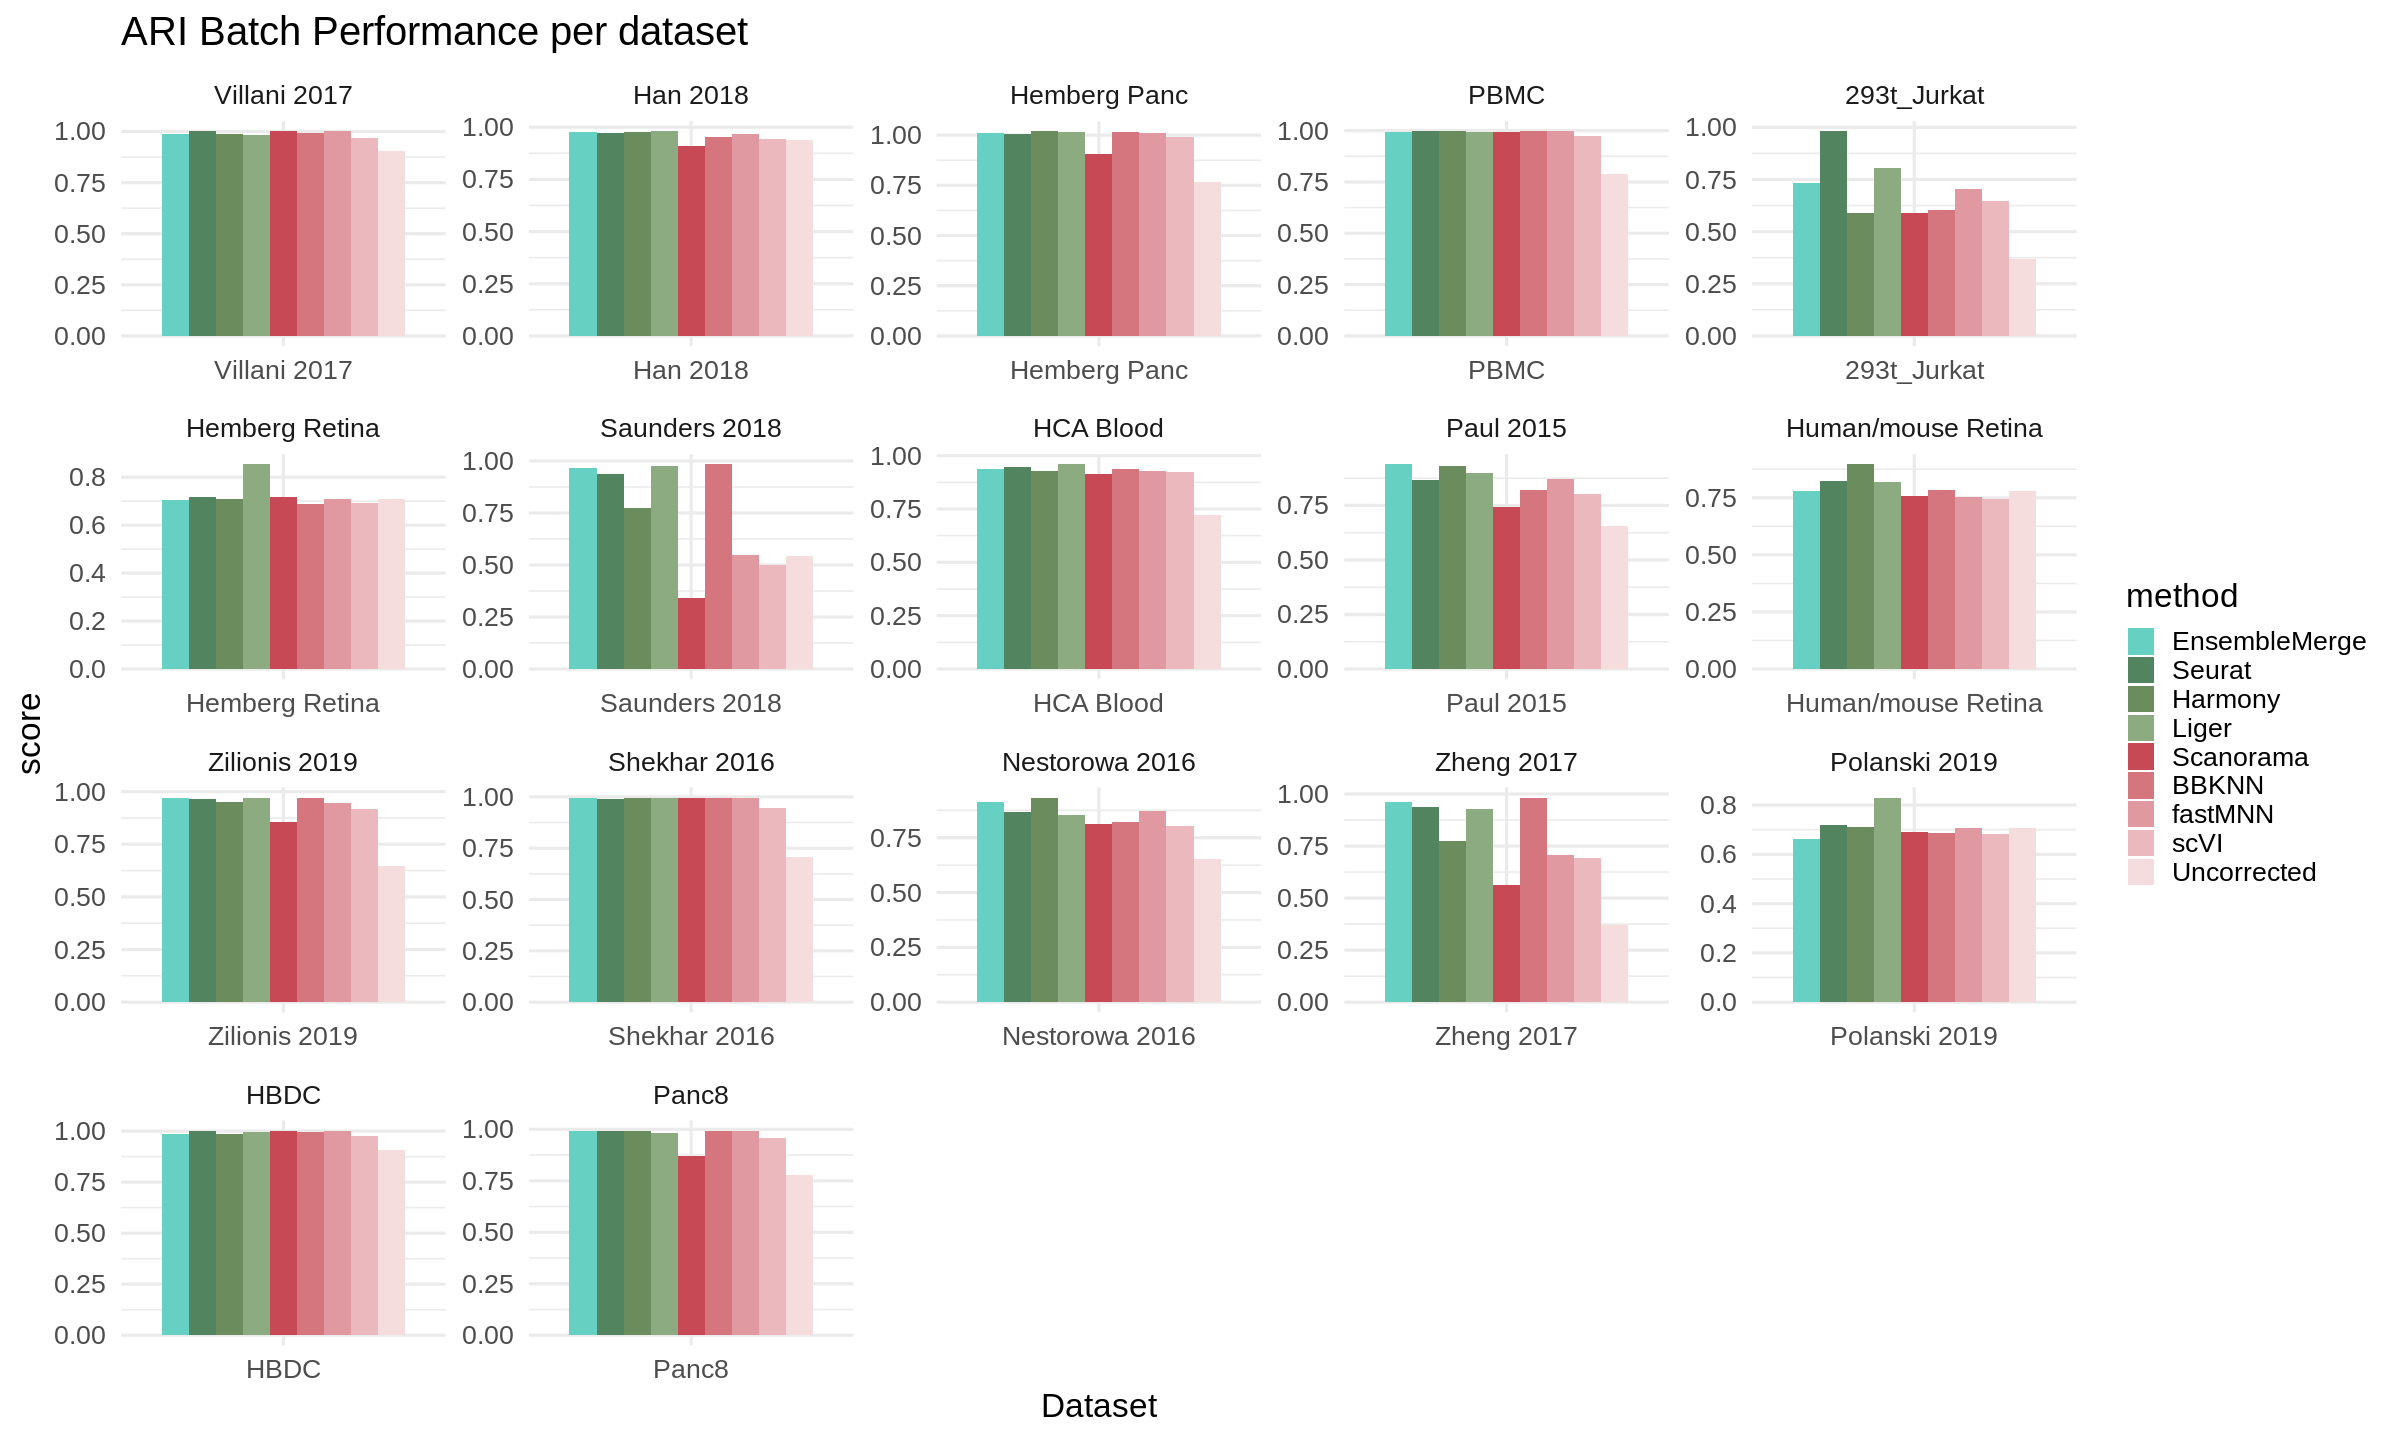

In [6]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ARI_Batch"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ARI Batch Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

## Supplemental Figure 3E

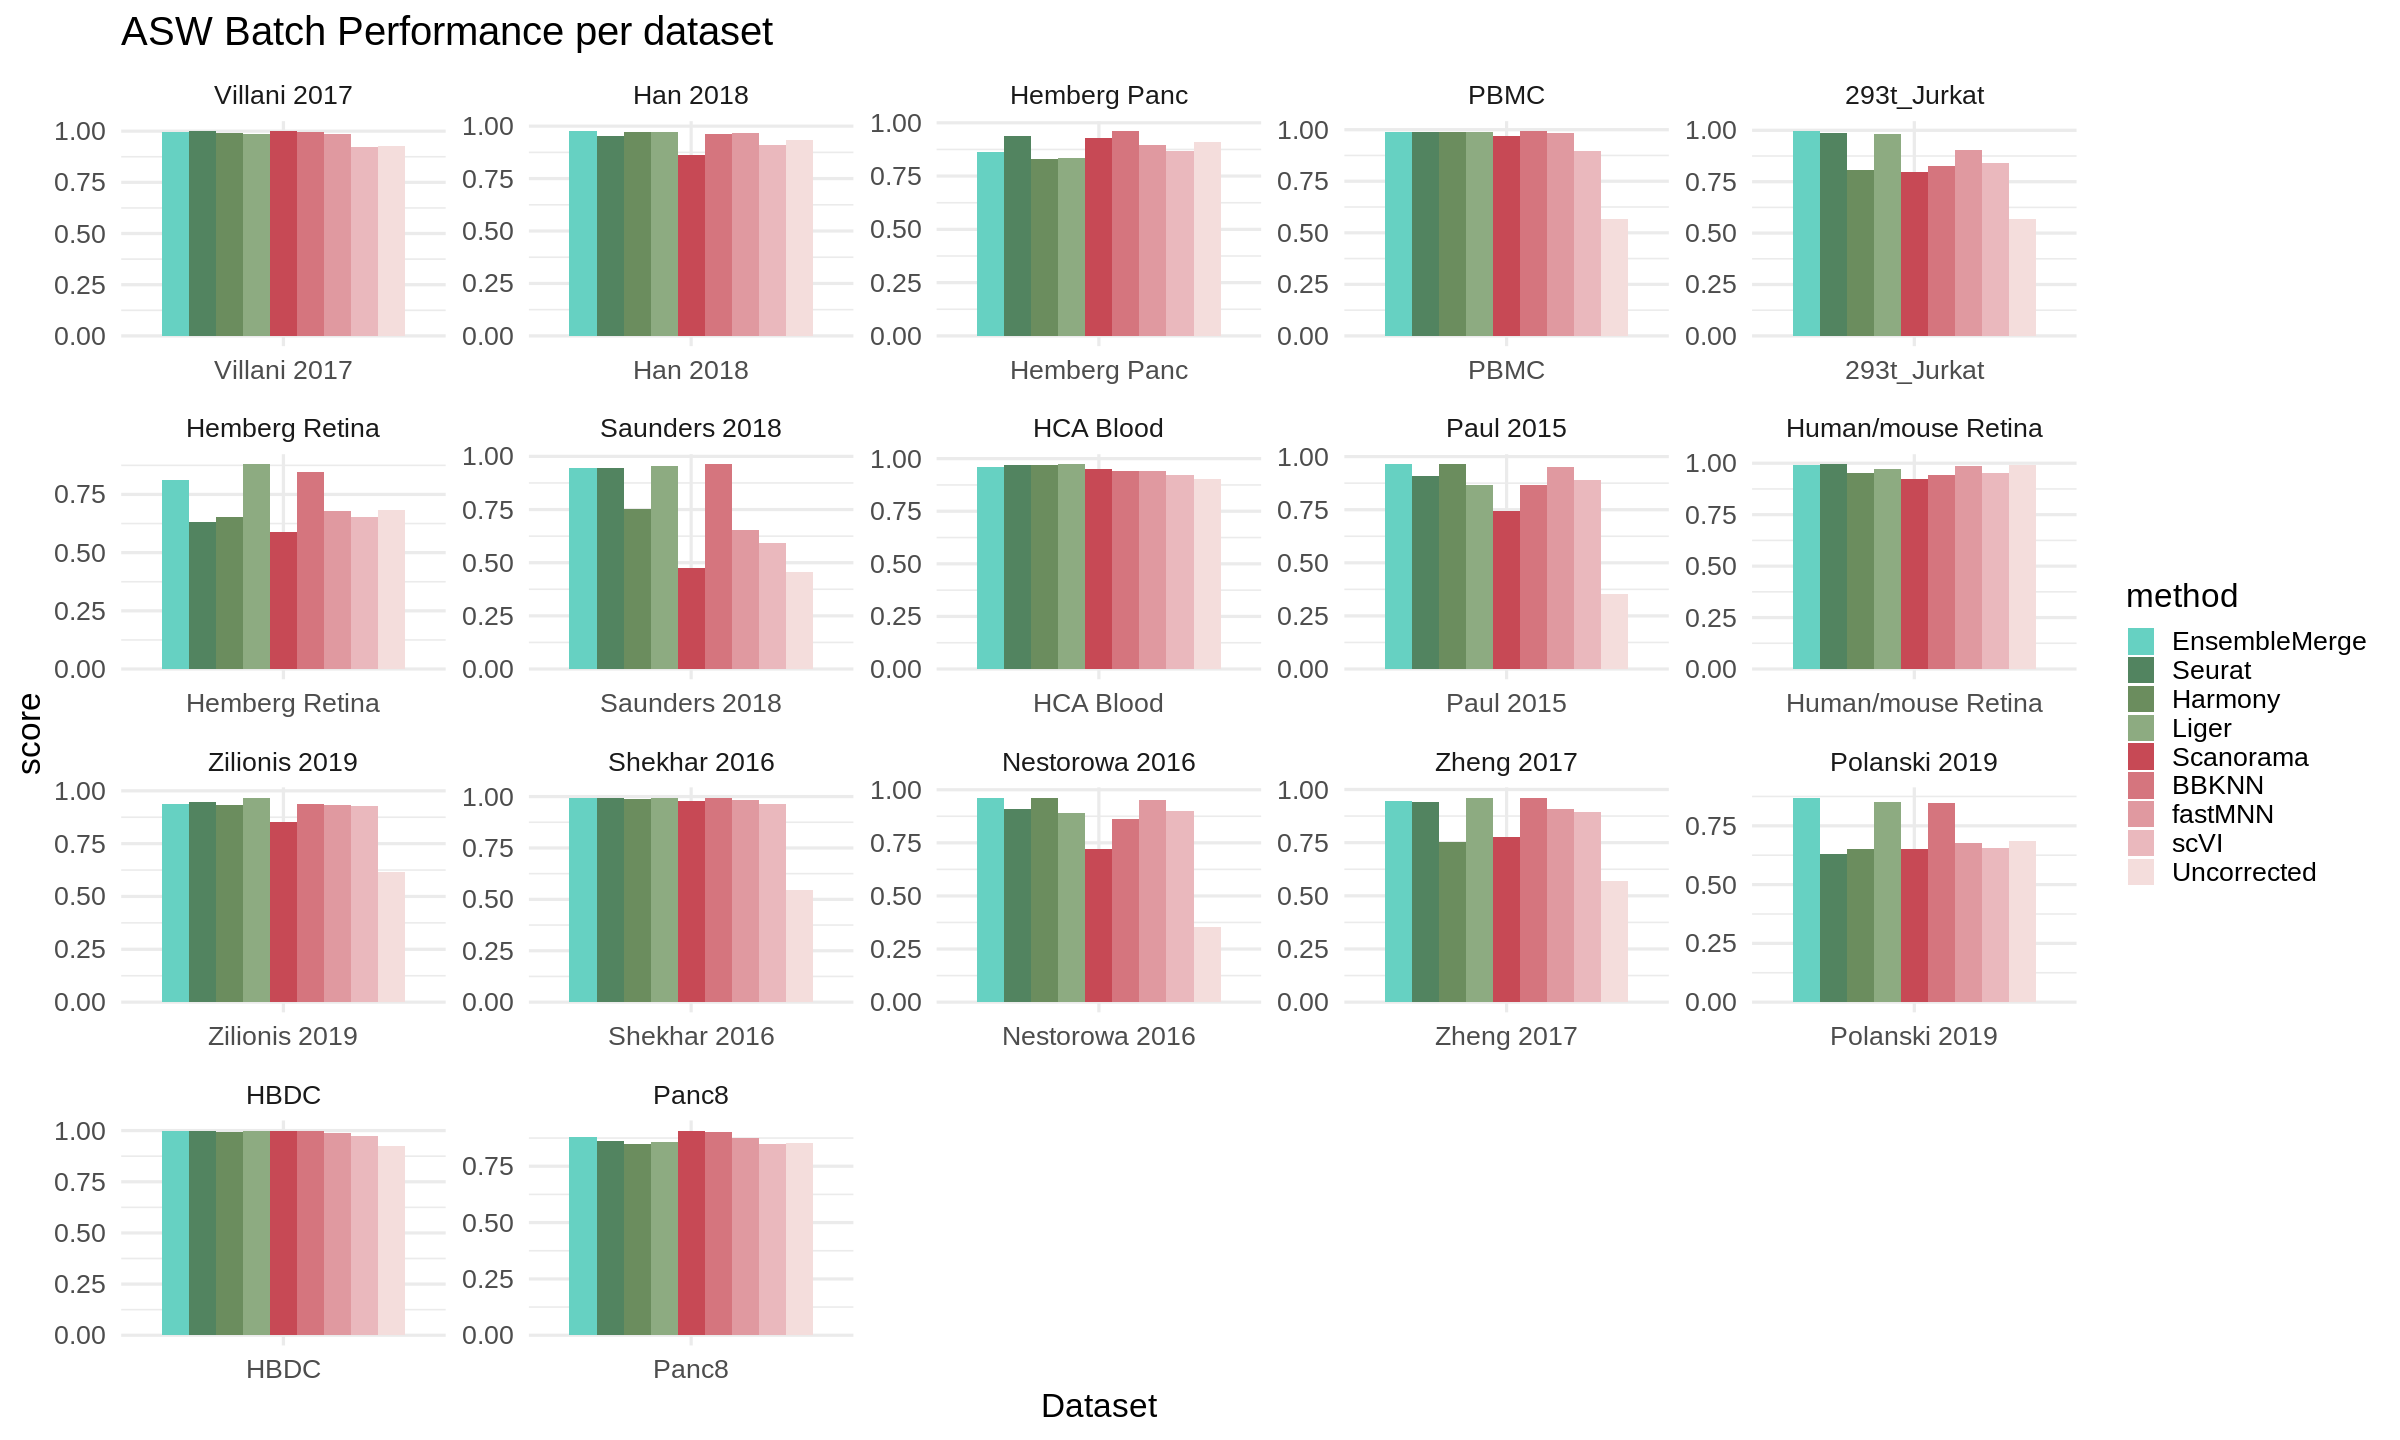

In [7]:
options(repr.plot.width = 20, repr.plot.height = 12)
dat[which(dat$score_method == "ASW_Batch"),] %>% 
  ggplot(aes(x = Dataset, y = score, fill = method)) + geom_bar(stat = "identity", position=position_dodge()) + theme_minimal(base_size=20) + ggtitle((label = "ASW Batch Performance per dataset"))  + facet_wrap(~Dataset, scales = "free") + scale_fill_manual(values = Method_Colors)

In [8]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.0.7    ggplot2_3.3.5  magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] pillar_1.6.4     compiler_4.1.2   base64enc_0.1-3  tools_4.1.2     
 [5] digest_0.6.29    uuid_1.0-3       jsonlite_1.7.2   evaluate_0.14   
 [9] lifecycle_1.0.1  tibble_3.